# Section 49: Deep NLP

- online-ft-100719
- 02/19/20

## Capstone Questions?


- 

## Learning Objectives

- Discuss word Embeddings and their advantages

- Discuss Recurrent Neural Networks / Sequence Model and text generation.
- Examine examples of text generated by GPT-2 the model by OpenAI that was once considered "too dangerous to release"


- Training Word2Vec models
- Using pretrained word embeddings


- Create a Classification Model for true-trump ("Twitter for Android") vs trump-staffer("Twitter for iPhone - from period of time when android was still in use)

    - Use lesson's W2Vec class in Sci-kit learn models
    - Use LSTMs
    - Use RNN/GRUs






- Compare:
    1.  Mean embeddings vs count/tfidf data with scikit learn.
    

# Word Embeddings

- **Up until now, the way we have had to input text into machine learning models was by vectorizing the words into numeric representation based upon the term frequency (count vectorization) or term-frequency inverse-document frequency (tf-idf).**

- **There are several aspects of language that are lost in these models.** 

    1. Sequence/order of words and phrases the order of the words in a sentence can change its meaning. 
    
        > - "When I first received this product, I loved it! After a few weeks I realized its flaws and now I hate it."
        
        > - "When I first received this product, I hated it. After a few weeks I realized I misjudged its flaws and now I love it."
        
    2. Information about semantic meaning is lost. How someone may use words may have a different meaning than for someone else. 
    

- Artificial Neural Networks/ deep NLP changes that by introducing the concept of Word Embeddings.

## ANNs Learn Semantic Meaning by Context

### Training a Word Embedding

<img src="https://raw.githubusercontent.com/jirvingphd/dsc-using-word2vec-online-ds-ft-100719/master/images/training_data.png">

### Context Reveals Semantic Relationships

**Consider the following 2 sentences**

> The King ruled over his kingdom with an iron fist. 

> The Queen ruled over her kingdom with an iron fist. 

<img src="https://raw.githubusercontent.com/jirvingphd/dsc-word-embeddings-online-ds-ft-100719/master/images/embeddings.png">


### Creates a vector for each word

<img src="https://raw.githubusercontent.com/jirvingphd/dsc-word-embeddings-online-ds-ft-100719/master/images/vectors.png">


- Kaggle Tutorial:  https://www.kaggle.com/learn/embeddings
- Google Embedding Crash Course: https://developers.google.com/machine-learning/crash-course/embeddings

# Embeddings with Word2Vec

## Skip-Gram Model

- Train the MLP to find the best weights (context) to map word-to-word
- But since words close to another usually contain context, we're _really_ teaching it context in those weights
- Gut check: similar contexted words can be exchanged
    + EX: "A fluffy **dog** is a great pet" <--> "A fluffy **cat** is a great pet"

- By training a text-generation model, we wind up with a lookup table where each word has its own vector 

<img src="https://raw.githubusercontent.com/jirvingphd/dsc-using-word2vec-online-ds-ft-100719/master/images/new_skip_gram_net_arch.png">


<img src="https://raw.githubusercontent.com/learn-co-students/dsc-using-word2vec-online-ds-ft-100719/master/images/new_word2vec_weight_matrix_lookup_table.png">

Each word will have a vector of contexts: the embeddings!

# Creating Word Embeddings with Trump's Tweets

# Training Word2Vec

In [1]:
!pip install -U fsds_100719
from fsds_100719.imports import *
import warnings
warnings.filterwarnings('ignore')

fsds_1007219  v0.7.6 loaded.  Read the docs: https://fsds.readthedocs.io/en/latest/ 


Handle,Package,Description
dp,IPython.display,Display modules with helpful display and clearing commands.
fs,fsds_100719,Custom data science bootcamp student package
mpl,matplotlib,Matplotlib's base OOP module with formatting artists
plt,matplotlib.pyplot,Matplotlib's matlab-like plotting module
np,numpy,scientific computing with Python
pd,pandas,High performance data structures and tools
sns,seaborn,High-level data visualization library based on matplotlib


['[i] Pandas .iplot() method activated.']


In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/jirvingphd/capstone-project-using-trumps-tweets-to-predict-stock-market/master/data/trump_tweets_12012016_to_01012020.csv')
df['datetime'] = pd.to_datetime(df['created_at'])
df = df.set_index('datetime').sort_index()
df

,source,text,created_at,retweet_count,favorite_count,is_retweet,id_str
datetime,,,,,,,
2016-12-01 14:37:57,Twitter for iPhone,My thoughts and prayers are with those affecte...,12-01-2016 14:37:57,12077,65724,False,804333718999539712
2016-12-01 14:38:09,Twitter for Android,Getting ready to leave for the Great State of ...,12-01-2016 14:38:09,9834,57249,False,804333771021570048
2016-12-01 22:52:10,Twitter for iPhone,Heading to U.S. Bank Arena in Cincinnati Ohio ...,12-01-2016 22:52:10,5564,31256,False,804458095569158144
2016-12-02 02:45:18,Twitter for iPhone,Thank you Ohio! Together we made history – and...,12-02-2016 02:45:18,17283,72196,False,804516764562374656
2016-12-03 00:44:20,Twitter for Android,The President of Taiwan CALLED ME today to wis...,12-03-2016 00:44:20,24700,111106,False,804848711599882240
...,...,...,...,...,...,...,...
2020-01-01 01:17:43,Twitter for iPhone,RT @SenJohnKennedy: I think Speaker Pelosi is ...,01-01-2020 01:17:43,8893,0,True,1212181071988703232
2020-01-01 01:18:47,Twitter for iPhone,RT @DanScavino: https://t.co/CJRPySkF1Z,01-01-2020 01:18:47,10796,0,True,1212181341078458369
2020-01-01 01:22:28,Twitter for iPhone,Our fantastic First Lady! https://t.co/6iswto4WDI,01-01-2020 01:22:28,27567,132633,False,1212182267113680896


### Resources:

- Two Part Word2Vec Tutorial  (linked from Learn)
    - [Part 1: The Skip-Gram Model](http://mccormickml.com/2016/04/19/word2vec-tutorial-the-skip-gram-model/)
    - [Part 2: Negative Sampling](http://mccormickml.com/2017/01/11/word2vec-tutorial-part-2-negative-sampling/)


- `sentences`: dataset to train on
- `size`: how big of a word vector do we want
- `window`: how many words around the target word to train with
- `min_count`: how many times the word shows up in corpus; we don't want words that are rarely used
- `workers`: number of threads (individual task "workers")

```python
from gensim.models import Word2Vec

# Let's assume we have our text corpus already tokenized and stored inside the variable 'data'--the regular text preprocessing steps still need to be handled before training a Word2Vec model!

model = Word2Vec(data, size=100, window=5, min_count=1, workers=4)

model.train(data, total_examples=model.corpus_count)
```

In [4]:
from nltk import word_tokenize
from gensim.models import Word2Vec
from gensim.utils import simple_preprocess
import re

## Removing URLs from Tweets
def find_urls(string): 
    return re.findall(r"(http[s]?://\w*\.\w*/+\w+)",string)

def sub_urls(string,replace_with=' '):
    return re.sub(r"(http[s]?://\w*\.\w*/+\w+)",replace_with,string)


df['text_clean'] = df['text'].apply(lambda x: sub_urls(x,' '))

# data = df['text'].map(word_tokenize)
# data_lower = list(map(lambda x: [w.lower() for w in x],data))
data_lower = df['text_clean'].map(lambda x: simple_preprocess(x))#word_tokenize)

data_lower

datetime
2016-12-01 14:37:57    [my, thoughts, and, prayers, are, with, those,...
2016-12-01 14:38:09    [getting, ready, to, leave, for, the, great, s...
2016-12-01 22:52:10    [heading, to, bank, arena, in, cincinnati, ohi...
2016-12-02 02:45:18    [thank, you, ohio, together, we, made, history...
2016-12-03 00:44:20    [the, president, of, taiwan, called, me, today...
                                             ...                        
2020-01-01 01:17:43    [rt, senjohnkennedy, think, speaker, pelosi, i...
2020-01-01 01:18:47                                     [rt, danscavino]
2020-01-01 01:22:28                        [our, fantastic, first, lady]
2020-01-01 01:30:35                                   [happy, new, year]
2020-01-01 03:12:07                                                   []
Name: text_clean, Length: 14066, dtype: object

In [5]:
model = Word2Vec(data_lower,size=100,window=4,min_count=1,workers=4)

In [6]:
model.train(data_lower, total_examples=model.corpus_count,epochs=10)

(2776665, 3507490)

In [11]:
wv = model.wv
wv#.keys()

In [12]:
wv['republican']

array([-1.0441422 , -1.3400474 , -0.48349404,  1.2318405 ,  1.0300288 ,
       -0.1841132 , -2.2662663 ,  1.2113218 ,  0.27159786,  0.5592071 ,
        0.40264246, -1.0363538 , -0.8353529 ,  0.6238851 , -0.81602544,
       -0.06274556, -0.28003153,  0.3028902 , -0.6431018 , -1.8135765 ,
       -0.08216637,  0.00627187,  1.368685  ,  0.7768824 ,  1.5085108 ,
        0.97635674, -0.5782102 , -0.6643281 ,  2.246749  ,  0.9704059 ,
       -0.29370403,  0.31591713,  1.7253847 ,  0.16133024, -0.06745923,
       -0.8530409 , -1.6180444 ,  1.1299778 , -1.2043031 , -1.5047876 ,
       -1.4650787 ,  0.62775284, -0.5846169 ,  2.1484647 , -0.701756  ,
        1.2966952 , -2.0622768 ,  0.52069587,  0.8544355 , -0.33878034,
       -0.45587447, -0.8520748 , -0.08836588, -0.02748133, -1.5334725 ,
       -0.12875897,  0.19710042, -1.9034214 ,  0.47731668,  1.6721268 ,
        1.5553526 , -0.40459418,  0.3746726 ,  0.14280896,  0.9315035 ,
       -1.8889251 , -0.09724033, -2.5183935 ,  1.5804906 , -1.45

In [13]:
wv.most_similar('republican')

[('democrat', 0.7441943287849426),
 ('party', 0.7005594968795776),
 ('opposition', 0.6549899578094482),
 ('democratic', 0.6404237747192383),
 ('candidates', 0.6367565989494324),
 ('reaffirms', 0.6234216690063477),
 ('senators', 0.6177035570144653),
 ('shambles', 0.6147098541259766),
 ('bitterness', 0.6097106337547302),
 ('race', 0.6050623655319214)]

In [14]:
wv.most_similar(negative=['democrat'])

[('breakthru', 0.49223625659942627),
 ('skorea', 0.43517446517944336),
 ('japan', 0.42444875836372375),
 ('nate', 0.4191588759422302),
 ('insists', 0.3892199695110321),
 ('cushy', 0.38824549317359924),
 ('automobiles', 0.37766599655151367),
 ('spouse', 0.3747156262397766),
 ('lifeline', 0.36986300349235535),
 ('minster', 0.36087173223495483)]

#### Word2Vec params

- There are many parameters to hypertune, which could take a lot more time and effort than you may think (trust me)...

```python
## For initializing model
sentences=None,
    size=100,
    alpha=0.025,
    window=5,
    min_count=5,
    max_vocab_size=None,
    sample=0.001,
    seed=1,
    workers=3,
    min_alpha=0.0001,
    sg=0,
    hs=0,
    negative=5,
    cbow_mean=1,
    hashfxn=<built-in function hash>,
    iter=5,
    null_word=0,
    trim_rule=None,
    sorted_vocab=1,
    batch_words=10000,
    compute_loss=False,
    callbacks=(),
    
    
## For training 
    sentences,
    total_examples=None,
    total_words=None,
    epochs=None,
    start_alpha=None,
    end_alpha=None,
    word_count=0,
    queue_factor=2,
    report_delay=1.0,
    compute_loss=False,
    callbacks=(),
    ```

In [15]:
# ### USING WORD VECTOR MATH TO GET A FEEL FOR QUALITY OF MODE
def word_math(wv,pos_words=['hillary'],neg_words=['bill'],
              verbose=True,return_vec=False):
    if isinstance(pos_words,str):
        pos_words=[pos_words]
    if isinstance(neg_words,str):
        neg_words=[neg_words]


    pos_eqn = '+'.join(pos_words)
    neg_eqn = '-'.join(neg_words)

    print('---'*15)    
    print(f"[i] Result for:\t{pos_eqn}{' - '+neg_eqn if len(neg_eqn)>0 else ' '}")
    print('---'*15)

    answer = wv.most_similar(positive=pos_words,negative=neg_words)
    
    if verbose:
          [print(f"- {ans[0]} ({round(ans[1],3)})") for ans in answer]
          print('---'*15,'\n\n')

    if return_vec: 
          return answer
    

In [22]:
wv.most_similar(positive=['covfefe'],negative=['mistake'])
wv.most_similar(positive=['woman'],negative=['respect'])

[('devin', 0.6477282047271729),
 ('drew', 0.6355173587799072),
 ('mukasey', 0.6347328424453735),
 ('mark', 0.6333678364753723),
 ('falcons', 0.6327143311500549),
 ('jonhusted', 0.6323051452636719),
 ('pollster', 0.6310784220695496),
 ('meganrapino', 0.6267371773719788),
 ('mclaughlin', 0.6228545308113098),
 ('clintwelborn', 0.6212198734283447)]

In [16]:
equation_list=[(['america','crime'],[]),
               
               (['democrats','russia'],[]),
               (['republican'],['honor']),
               (['man','power'],[]),
               (['russia','honor'],[]),
              (['china','tariff'])]

for eqn in equation_list:
#     print('\n\n')
    word_math(wv,*eqn)
#     word_math(wv2,*eqn)

---------------------------------------------
[i] Result for:	america+crime 
---------------------------------------------
- borders (0.74)
- choice (0.655)
- strong (0.623)
- strength (0.601)
- tough (0.595)
- slash (0.587)
- shift (0.586)
- reprehensible (0.586)
- california (0.585)
- open (0.584)
--------------------------------------------- 


---------------------------------------------
[i] Result for:	democrats+russia 
---------------------------------------------
- dems (0.759)
- facts (0.702)
- russian (0.692)
- russians (0.691)
- dnc (0.687)
- corruption (0.684)
- rigged (0.683)
- hoax (0.675)
- collusion (0.661)
- questions (0.658)
--------------------------------------------- 


---------------------------------------------
[i] Result for:	republican - honor
---------------------------------------------
- democrat (0.671)
- dem (0.539)
- democratic (0.52)
- republicans (0.498)
- party (0.495)
- dems (0.493)
- liberal (0.488)
- left (0.472)
- dust (0.455)
- contenders (0.452

___ 

___

# Sequence Models: Recurrent Neural Networks

<img src="https://raw.githubusercontent.com/jirvingphd/dsc-sequence-model-use-cases-online-ds-ft-100719/master/images/rnn.gif">

<img src="https://raw.githubusercontent.com/jirvingphd/dsc-understanding-recurrent-neural-networks-online-ds-ft-100719/master/images/unrolled.gif">

### The vanishing gradient problem
<img src="https://raw.githubusercontent.com/learn-co-students/dsc-lstms-and-grus-online-ds-ft-100719/master/images/vanishing_gradient.png">
- Keeping too much information about the past causes a vanishing gradient, where the oldest time steps in the sequence get updated more slowly as the size of the timesteps increases.
- The solution is to implement mechanisms of forgeting.


## LSTMs & GRUs

- LSTM (Long Short Term Memory Cells)
   - Input Gate
   - Forget Gate
   - Output Gate
<img src="https://raw.githubusercontent.com/jirvingphd/dsc-sequence-model-use-cases-online-ds-ft-100719/master/images/RNN-unrolled.png">


- GRU (Gated Recurrent Units (GRUs)
    - Reset Gate
    - Update Gate
   - Output Gate
<img src="https://raw.githubusercontent.com/learn-co-students/dsc-lstms-and-grus-online-ds-ft-100719/master/images/new_gru.png" width=50%>

## So... what is so great/special about RNNs?


- They are fantastic at analyzing data with a strong temporal component.

- They can capture semantic meaning.

- They learn to **generate text.**
    - chatbots

# 💬 OK, so deep NLP is awesome and good for humanity, right?

- Well, hopefully...



- **OpenAI had built an extremely powerful text generator called GPT-2.**

    - It is trained on 40 GB worth of internet text. 
    
    - At first they refused to released this updated version to the public due to fears regarding propaganda and fake news generation. 
    
    
- What if **anyone** could generate paragraphs and paragraphs of text with little to no effort, just a simple prompt for the model?
    
> But, come on... is it really that scary?

- Quite frankly, **yes**. Examples (by increasing severity/reprecussions)

    - [A light-hearted first example:](https://openai.com/blog/better-language-models/#sample1)
    - [A false news story](https://openai.com/blog/better-language-models/#sample2)
    - [Fake News stories to damage reputations](https://openai.com/blog/better-language-models/#sample3)
    - [Propaganda to shift public perceptions of government policies](https://openai.com/blog/better-language-models/#sample8)

___

## GloVe - Global Vectors for Word Representation

### Transfer Learning

- Usually embeddings are hundreds of dimensions
- Just use the word embeddings already learned from before!
    + Unless very specific terminology, context will likely carry within language
- Comparable to CNN transfer learning

## Using Embeddings in Classification

### Embedding Layers
You should make note of a couple caveats that come with using embedding layers in your neural network -- namely:

* The embedding layer must always be the first layer of the network, meaning that it should immediately follow the `Input()` layer 
* All words in the text should be integer-encoded, with each unique word encoded as it's own unique integer  
* The size of the embedding layer must always be greater than the total vocabulary size of the dataset! The first parameter denotes the vocabulary size, while the second denotes the size of the actual word vectors
* The size of the sequences passed in as data must be set when creating the layer (all data will be converted to padded sequences of the same size during the preprocessing step) 


[Keras Documentation for Embedding Layers](https://keras.io/layers/embeddings/).

### Using Pre-Trained Vectors

In [23]:
import os
folder = '/Users/jamesirving/Datasets/'#glove.twitter.27B/'
print(os.listdir(folder))
glove_file = folder+'glove.6B/glove.6B.50d.txt'#'glove.twitter.27B.50d.txt'
glove_twitter_file = folder+'glove.twitter.27B/glove.twitter.27B.50d.txt'
print(glove_file)
print(glove_twitter_file)

['opto_DID_drinking_data.xlsx', 'sample-s2.csv', 'glove.twitter.27B', '.DS_Store', 'lending-club-loan-data', 'lending-club-loan-data.zip', 'puzzle_dataset', 'glove.6B']
/Users/jamesirving/Datasets/glove.6B/glove.6B.50d.txt
/Users/jamesirving/Datasets/glove.twitter.27B/glove.twitter.27B.50d.txt


#### Keeping only the vectors needed

In [24]:
## This line of code for getting all words bugs me
total_vocabulary = set(word for tweet in data_lower for word in tweet)
len(total_vocabulary)

15410

In [25]:
glove = {}
with open(glove_file,'rb') as f:#'glove.6B.50d.txt', 'rb') as f:
    for line in f:
        parts = line.split()
        word = parts[0].decode('utf-8')
        if word in total_vocabulary:
            vector = np.array(parts[1:], dtype=np.float32)
            glove[word] = vector

In [26]:
glove['republican']

array([-0.62964 , -0.41852 ,  1.0236  , -0.20629 ,  0.18681 ,  1.1836  ,
       -1.1125  ,  0.061848, -0.98647 , -1.1978  , -2.0101  , -0.81715 ,
       -0.088324,  0.2431  , -0.94952 , -0.62524 ,  0.56778 , -0.66119 ,
        0.23107 , -0.732   , -0.75439 , -0.54928 ,  0.3512  , -0.44388 ,
       -0.28215 , -2.4233  , -0.15651 , -0.31636 , -0.45465 ,  0.63483 ,
        2.0342  , -0.033718, -1.1777  , -1.2411  , -0.32364 , -1.0717  ,
       -1.0004  ,  0.28567 , -0.45446 , -0.9771  , -0.70622 ,  0.85814 ,
       -1.5202  ,  0.23351 , -0.38033 ,  0.2903  , -1.2494  , -0.17779 ,
       -0.31254 ,  1.2733  ], dtype=float32)

## Using Embeddings in Classification Models - sci-kit learn

- Embeddings can be used in Artificial Neural Networks as an input Embedding Layer
- Embeddings can be used in sci-kit learn models by taking the mean vector of a text/document and using the mean vector as the input into the model. 

### Make Finding Trump Dataset

- At the beginning of his presidency, Trump continued to use a non-secure Android phone for his personal use.
- Tweets from this period can be attributed to Trump or his staffers based on if it came from an Android device or an iPhone

In [27]:
df = pd.read_csv('https://raw.githubusercontent.com/jirvingphd/capstone-project-using-trumps-tweets-to-predict-stock-market/master/data/trump_tweets_12012016_to_01012020.csv')
df['datetime'] = pd.to_datetime(df['created_at'])
df = df.set_index('datetime').sort_index()
df

,source,text,created_at,retweet_count,favorite_count,is_retweet,id_str
datetime,,,,,,,
2016-12-01 14:37:57,Twitter for iPhone,My thoughts and prayers are with those affecte...,12-01-2016 14:37:57,12077,65724,False,804333718999539712
2016-12-01 14:38:09,Twitter for Android,Getting ready to leave for the Great State of ...,12-01-2016 14:38:09,9834,57249,False,804333771021570048
2016-12-01 22:52:10,Twitter for iPhone,Heading to U.S. Bank Arena in Cincinnati Ohio ...,12-01-2016 22:52:10,5564,31256,False,804458095569158144
2016-12-02 02:45:18,Twitter for iPhone,Thank you Ohio! Together we made history – and...,12-02-2016 02:45:18,17283,72196,False,804516764562374656
2016-12-03 00:44:20,Twitter for Android,The President of Taiwan CALLED ME today to wis...,12-03-2016 00:44:20,24700,111106,False,804848711599882240
...,...,...,...,...,...,...,...
2020-01-01 01:17:43,Twitter for iPhone,RT @SenJohnKennedy: I think Speaker Pelosi is ...,01-01-2020 01:17:43,8893,0,True,1212181071988703232
2020-01-01 01:18:47,Twitter for iPhone,RT @DanScavino: https://t.co/CJRPySkF1Z,01-01-2020 01:18:47,10796,0,True,1212181341078458369
2020-01-01 01:22:28,Twitter for iPhone,Our fantastic First Lady! https://t.co/6iswto4WDI,01-01-2020 01:22:28,27567,132633,False,1212182267113680896


In [30]:
devices = ['Twitter for Android','Twitter for iPhone']
print(f'The first and last timestamps for the group {devices[0]}are:')
start,end= df.groupby('source').get_group(devices[0]).index[[0,-1]]
print(start) ,print(end)

The first and last timestamps for the group Twitter for Androidare:
2016-12-01 14:38:09
2017-03-25 14:41:14


(None, None)

In [31]:
## Puttig it all together
df_data = df[df['source'].isin(devices)].loc[start:end].copy()
df_data['source'].value_counts(normalize=True)

Twitter for Android    0.603648
Twitter for iPhone     0.396352
Name: source, dtype: float64

In [32]:
undersample = False

if undersample:
    ## Undersampling to match class
    iphone = df_data.loc[df_data['source']=='Twitter for iPhone']
    android = df_data.loc[df_data['source']=='Twitter for Android']
    print(len(iphone),len(android))
    df = pd.concat([iphone, 
                    android.sample(n=len(iphone),
                                   random_state=123)],
                    axis=0)

else:
    df= df_data
    
df

,source,text,created_at,retweet_count,favorite_count,is_retweet,id_str
datetime,,,,,,,
2016-12-01 14:38:09,Twitter for Android,Getting ready to leave for the Great State of ...,12-01-2016 14:38:09,9834,57249,False,804333771021570048
2016-12-01 22:52:10,Twitter for iPhone,Heading to U.S. Bank Arena in Cincinnati Ohio ...,12-01-2016 22:52:10,5564,31256,False,804458095569158144
2016-12-02 02:45:18,Twitter for iPhone,Thank you Ohio! Together we made history – and...,12-02-2016 02:45:18,17283,72196,False,804516764562374656
2016-12-03 00:44:20,Twitter for Android,The President of Taiwan CALLED ME today to wis...,12-03-2016 00:44:20,24700,111106,False,804848711599882240
2016-12-03 01:41:30,Twitter for Android,Interesting how the U.S. sells Taiwan billions...,12-03-2016 01:41:30,38805,122905,False,804863098138005504
...,...,...,...,...,...,...,...
2017-03-24 17:03:46,Twitter for iPhone,Today I was pleased to announce the official a...,03-24-2017 17:03:46,12933,66692,False,845320243614547968
2017-03-24 17:59:42,Twitter for iPhone,Today I was thrilled to announce a commitment ...,03-24-2017 17:59:42,20212,89339,False,845334323045765121
2017-03-25 13:29:17,Twitter for iPhone,Happy #MedalOfHonorDay to our heroes! ➡️https:...,03-25-2017 13:29:17,14139,68302,False,845628655493677056


In [ ]:
# # df.to_csv('datasets/trump_tweets_iphone_vs_twitter.csv',index=False)
# df= pd.read_csv('datasets/trump_tweets_iphone_vs_twitter.csv')
# df

In [ ]:
df['source'].value_counts()

### Creating Mean Embeddings

In [33]:
from sklearn.model_selection import train_test_split
from nltk import word_tokenize

y = pd.get_dummies(df['source'],drop_first=True).values
X = df['text'].str.lower().map(word_tokenize)

X_idx = list(range(len(X)))
train_idx,test_idx = train_test_split(X_idx,random_state=123)

X[train_idx]

datetime
2017-03-15 20:55:52    [i, will, be, interviewed, by, @, tuckercarlso...
2016-12-16 16:54:28    [#, thankyoutour2016, tonight-, orlando, flori...
2017-03-16 00:03:23    [in, nashville, tennessee, !, lets, make, amer...
2016-12-06 21:17:45    [departing, new, york, with, general, james, '...
2017-02-02 11:34:36    [iran, has, been, formally, put, on, notice, f...
                                             ...                        
2016-12-22 16:50:30    [the, united, states, must, greatly, strengthe...
2017-01-29 21:45:58    [the, joint, statement, of, former, presidenti...
2017-02-08 12:03:18    [if, the, u.s., does, not, win, this, case, as...
2017-02-05 00:48:12    [the, judge, opens, up, our, country, to, pote...
2017-03-04 11:49:00    [is, it, legal, for, a, sitting, president, to...
Name: text, Length: 452, dtype: object

In [34]:
def train_test_split_idx(X, y, train_idx,test_idx):
    # try count vectorized first
    X_train = X[train_idx].copy()
    y_train = y[train_idx].copy()
    X_test = X[train_idx].copy()
    y_test = y[train_idx].copy()
    return X_train, X_test,y_train, y_test

X_train, X_test,y_train, y_test = train_test_split_idx(X,y,train_idx,test_idx)

In [35]:
# df['combined_text'] = df['headline'] + ' ' + df['short_description']
# data = df['combined_text'].map(word_tokenize).values

In [36]:
class W2vVectorizer(object):
    
    def __init__(self, w2v):
        # Takes in a dictionary of words and vectors as input
        self.w2v = w2v
        if len(w2v) == 0:
            self.dimensions = 0
        else:
            self.dimensions = len(w2v[next(iter(glove))])
    
    # Note: Even though it doesn't do anything, it's required that this object implement a fit method or else
    # it can't be used in a scikit-learn pipeline  
    def fit(self, X, y):
        return self
            
    def transform(self, X):
        return np.array([
            np.mean([self.w2v[w] for w in words if w in self.w2v]
                   or [np.zeros(self.dimensions)], axis=0) for words in X])

In [37]:
# target = df['source']
# data = df['text'].map(word_tokenize)
# data_lower = list(map(lambda x: [w.lower() for w in x],data))

In [38]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score

rf =  Pipeline([('Word2Vec Vectorizer', W2vVectorizer(glove)),
              ('Random Forest', RandomForestClassifier(n_estimators=100, verbose=True))])
svc = Pipeline([('Word2Vec Vectorizer', W2vVectorizer(glove)),
                ('Support Vector Machine', SVC())])
lr = Pipeline([('Word2Vec Vectorizer', W2vVectorizer(glove)),
              ('Logistic Regression', LogisticRegression())])

models = [('Random Forest', rf),
          ('Support Vector Machine', svc),
          ('Logistic Regression', lr)]
# models = {'Random Forest':RandomForestClassifier(n_estimators=100, verbose=True),
#           'SVC':SVC(),'lr':LogisticRegression()}

In [39]:
scores = [(name, cross_val_score(model, X_train, y_train, cv=2).mean()) for name, model, in models]

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


In [40]:
scores

[('Random Forest', 0.8141592920353982),
 ('Support Vector Machine', 0.7809734513274336),
 ('Logistic Regression', 0.7898230088495575)]

## Using Embedding Layers in ANN

In [41]:
from keras.layers import Input, Dense, LSTM, Embedding
from keras.layers import Dropout, Activation, Bidirectional, GlobalMaxPool1D
from keras.models import Sequential
from keras import initializers, regularizers, constraints, optimizers, layers


from keras.preprocessing import text, sequence
from keras.utils import to_categorical
from keras.preprocessing.sequence import pad_sequences


Using TensorFlow backend.


In [42]:
from py_files import keras_gridsearch as kg
from sklearn import metrics
from fsds_100719.imports import *

In [43]:
from keras.preprocessing import text,sequence
from sklearn.model_selection import train_test_split
from nltk import word_tokenize
from gensim.utils import simple_preprocess
from keras.utils import to_categorical


# y_t = pd.get_dummies(df['source']).values
y_t = to_categorical(df['source'].map({'Twitter for Android':1,
                                       'Twitter for iPhone':0}),num_classes=2)

# X = df['text'].str.lower().map(word_tokenize)
X = df['text'].map(simple_preprocess).values#df['text'].str.lower().map(word_tokenize)
y_t.shape

(603, 2)

In [45]:
MAX_WORDS = 25000
tokenizer = text.Tokenizer(num_words=MAX_WORDS)

tokenizer.fit_on_texts(X) #df['text'])
sequences = tokenizer.texts_to_sequences(X) #df['text'])

X_t = sequence.pad_sequences(sequences, maxlen=100)
X_t.shape

(603, 100)

In [46]:
X_train, X_test, y_train, y_test =train_test_split(X_t,y_t,random_state=123) 
X_train.shape,y_test.shape


((452, 100), (151, 2))

Instructions for updating:
Colocations handled automatically by placer.
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 128)         3200000   
_________________________________________________________________
lstm_1 (LSTM)                (None, None, 25)          15400     
_________________________________________________________________
global_max_pooling1d_1 (Glob (None, 25)                0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 25)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 25)                650       
_________________________________________________________________
dropout_2 (Dropout)          (None, 25)                0         
________________________________________________

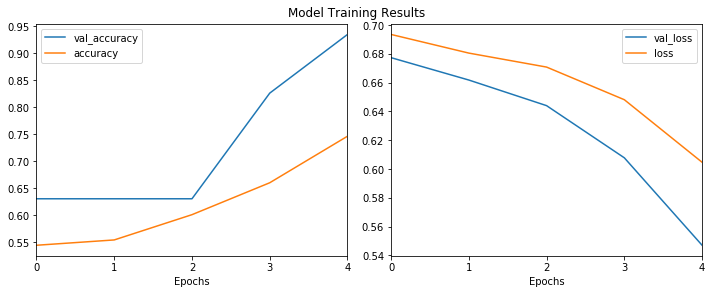



------------------------------------------------------------
	CLASSIFICATION REPORT:
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.95      0.74      0.83        57
           1       0.86      0.98      0.92        94

    accuracy                           0.89       151
   macro avg       0.91      0.86      0.87       151
weighted avg       0.90      0.89      0.88       151



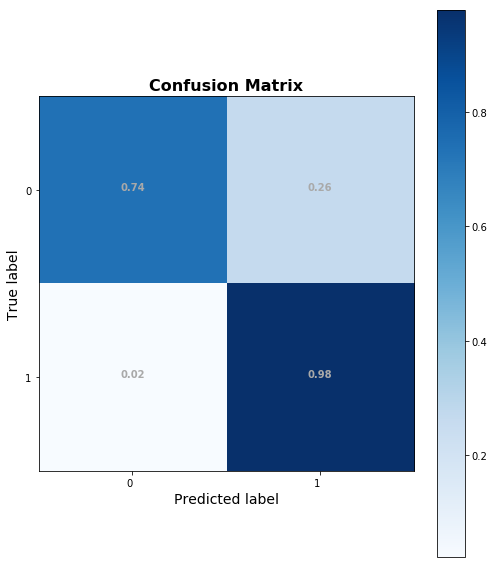

In [47]:
EMBEDDING_SIZE = 128 #where codealong get this?

model=Sequential()
model.add(Embedding(MAX_WORDS, EMBEDDING_SIZE))
model.add(LSTM(25,return_sequences=True))
model.add(GlobalMaxPool1D())
model.add(Dropout(0.5))
model.add(Dense(25, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))

model.compile(loss='binary_crossentropy',#'categorical_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])
model.summary()

history = model.fit(X_train, y_train, epochs=5, batch_size=32, validation_split=0.1)

y_hat_test = model.predict_classes(X_test)
kg.evaluate_model(y_test,y_hat_test,history)

## RNN or GRU

In [48]:
## GRU Model
from keras import models, layers, optimizers, regularizers
modelG = models.Sequential()

## Get and add embedding_layer
# embedding_layer = ji.make_keras_embedding_layer(wv, X_train)
modelG.add(Embedding(MAX_WORDS, EMBEDDING_SIZE))

# modelG.add(layers.SpatialDropout1D(0.5))
# modelG.add(layers.Bidirectional(layers.GRU(units=100, dropout=0.5, recurrent_dropout=0.2,return_sequences=True)))
modelG.add(layers.Bidirectional(layers.GRU(units=100, dropout=0.5, recurrent_dropout=0.2)))
modelG.add(layers.Dense(2, activation='softmax'))

modelG.compile(loss='categorical_crossentropy',optimizer="adam",metrics=['acc'])#,'val_acc'])#, callbacks=callbacks)
modelG.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, None, 128)         3200000   
_________________________________________________________________
bidirectional_1 (Bidirection (None, 200)               137400    
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 402       
Total params: 3,337,802
Trainable params: 3,337,802
Non-trainable params: 0
_________________________________________________________________


Train on 361 samples, validate on 91 samples
Epoch 1/10
361/361 [==============================] - 3s 8ms/step - loss: 0.6755 - acc: 0.5789 - val_loss: 0.6337 - val_acc: 0.6593
Epoch 2/10
361/361 [==============================] - 2s 5ms/step - loss: 0.6079 - acc: 0.6787 - val_loss: 0.5300 - val_acc: 0.9121
Epoch 3/10
361/361 [==============================] - 2s 5ms/step - loss: 0.4778 - acc: 0.8199 - val_loss: 0.4230 - val_acc: 0.9011
Epoch 4/10
361/361 [==============================] - 2s 5ms/step - loss: 0.2842 - acc: 0.8892 - val_loss: 0.2957 - val_acc: 0.9231
Epoch 5/10
361/361 [==============================] - 2s 5ms/step - loss: 0.2094 - acc: 0.9418 - val_loss: 0.3320 - val_acc: 0.8901
Epoch 6/10
361/361 [==============================] - 2s 5ms/step - loss: 0.1400 - acc: 0.9778 - val_loss: 0.3119 - val_acc: 0.8791
Epoch 7/10
361/361 [==============================] - 2s 5ms/step - loss: 0.0691 - acc: 0.9751 - val_loss: 0.2491 - val_acc: 0.9121
Epoch 8/10
361/361 [===========

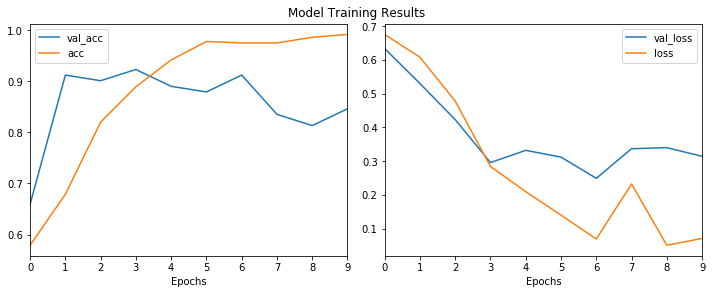



------------------------------------------------------------
	CLASSIFICATION REPORT:
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.74      0.81      0.77        57
           1       0.88      0.83      0.85        94

    accuracy                           0.82       151
   macro avg       0.81      0.82      0.81       151
weighted avg       0.83      0.82      0.82       151



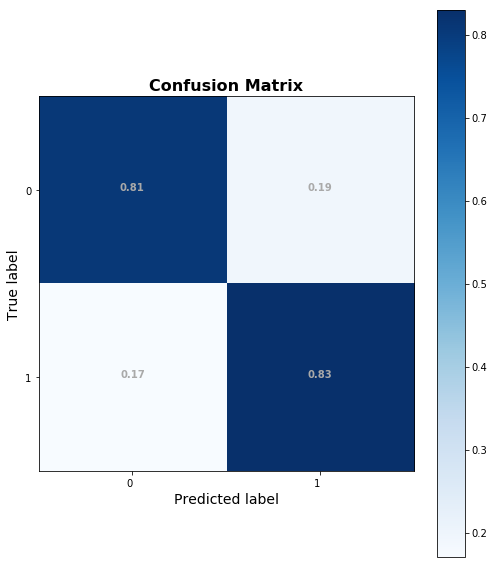

In [49]:

history = modelG.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

y_hat_test = modelG.predict_classes(X_test)
kg.evaluate_model(y_test,y_hat_test,history)

# APPENDIX

### Vectorization 

- Count vectorization
- Term Frequency-Inverse Document Frequency (TF-IDF)
    -  Used for multiple texts
    
    
**_Term Frequency_** is calculated with the following formula:

$$ \text{Term Frequency}(t) = \frac{\text{number of times it appears in a document}} {\text{total number of terms in the document}} $$ 

**_Inverse Document Frequency_** is calculated with the following formula:

$$ IDF(t) = log_e(\frac{\text{Total Number of Documents}}{\text{Number of Documents with it in it}})$$

The **_TF-IDF_** value for a given word in a given document is just found by multiplying the two!
